# Walsh

In [1]:
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import os, os.path
import glob
from copy import deepcopy, copy
from math import trunc, log

In [2]:
ima = []
for filename in glob.glob('imagesHW2/64x64/*.jpg'): #assuming gif
    im = Image.open(filename)
    im = im.convert('L')
    ima.append(im)

In [3]:
# n = 64  
# for i in range(len(ima)):
#     img = ima[i].resize((n,n), Image.ANTIALIAS)
#     img.save("imagesHW2/image" + str(i+10) + ".jpg") 

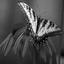

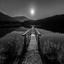

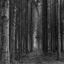

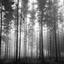

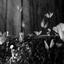

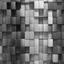

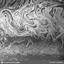

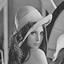

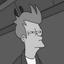

In [4]:
for i in range(len(ima)):
    display(ima[i])

In [5]:
def DecToBin(x,n):
    return format(x,'0'+ str(n) +'b')

In [6]:
def walsh_expx(x,u,l,n):
    x, u = DecToBin(x,n), DecToBin(u,n)
    #print("bin x:" + x)
    #print("bin u:" + u)
    #print("bin x at location: x[" + str(l) + "] " + x[l])
    #print("bin u at location: u[" + str(n-1-l)+ "] " + u[n-1-l])
    res = int(x[l]) * int(u[n-1-l])
    #print("res: " + str(res))
    
    return res 

In [7]:
def walshx(x,u,N):
    base = 1
    n = int(log(N,2))
    
    for i in range(n):
        walsh_exp = walsh_expx(x,u,i,n)
        #print(walsh_exp)
        base *= ((-1) ** walsh_exp)
        #print(base)
    #print("last:" + str(base))    
    return base

In [8]:
def create_kernel(N):
    kernel = np.zeros((N,N), dtype=float)
    for i in range(N):
        for j in range(N):
            kernel[i][j] = walshx(i,j,N)
    
    kernel /= N
    
    return kernel

In [9]:
def walshTrans(img):
    img = np.asarray(img)
    N = img.shape[0]
    kernel = create_kernel(N)
    arr = np.asarray(img)
    trans = np.matmul(kernel, img)
    trans = np.matmul(trans, kernel)
    trans = np.around(trans)
    #plt.imshow(trans, cmap="gray")
    return trans
    

In [10]:
trans= walshTrans(ima[1])

In [11]:
def InvWalshTrans(trans):
    N = trans.shape[0]
    kernel = create_kernel(N)
    inv = np.linalg.inv(kernel)
    inv_trans = np.matmul(inv, trans)
    inv_trans = np.matmul(inv_trans, inv)
    inv_trans = np.around(inv_trans)
    #plt.imshow(inv_trans, cmap="gray")
    return inv_trans

In [12]:
inv_trans=InvWalshTrans(trans[1])

In [13]:
def show(o_img, walsh, inv_img):    
    fig = plt.figure()
    fig.set_figheight(25)
    fig.set_figwidth(25)

    fig.add_subplot(1,3,1)
    plt.imshow(o_img, cmap='gray')

    # display the new image
    fig.add_subplot(1,3,2)
    plt.imshow(walsh, cmap='gray')

    fig.add_subplot(1,3,3)
    plt.imshow(inv_img, cmap='gray')

    plt.show(block=True)

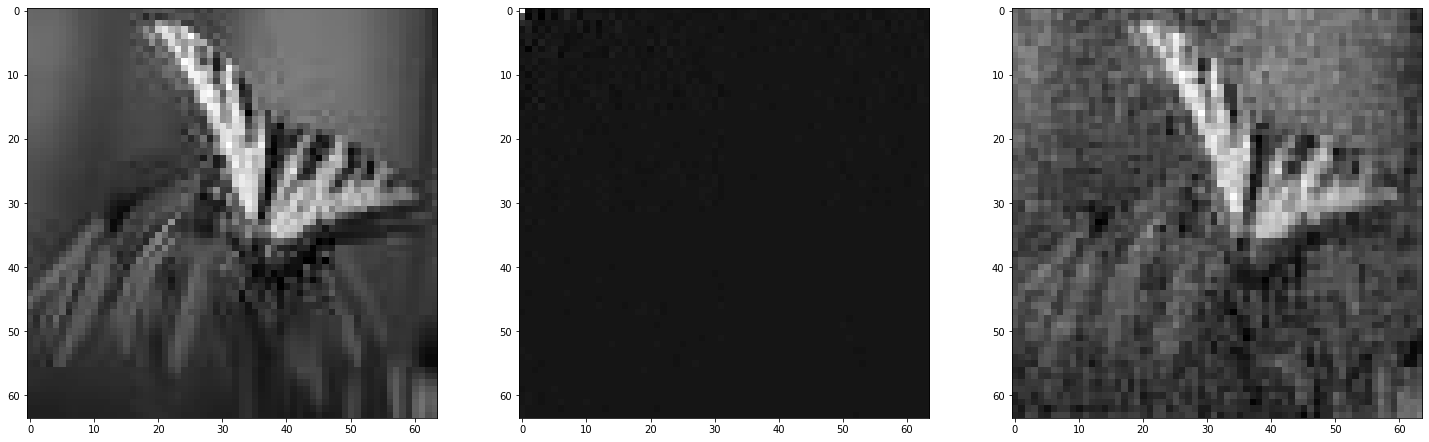

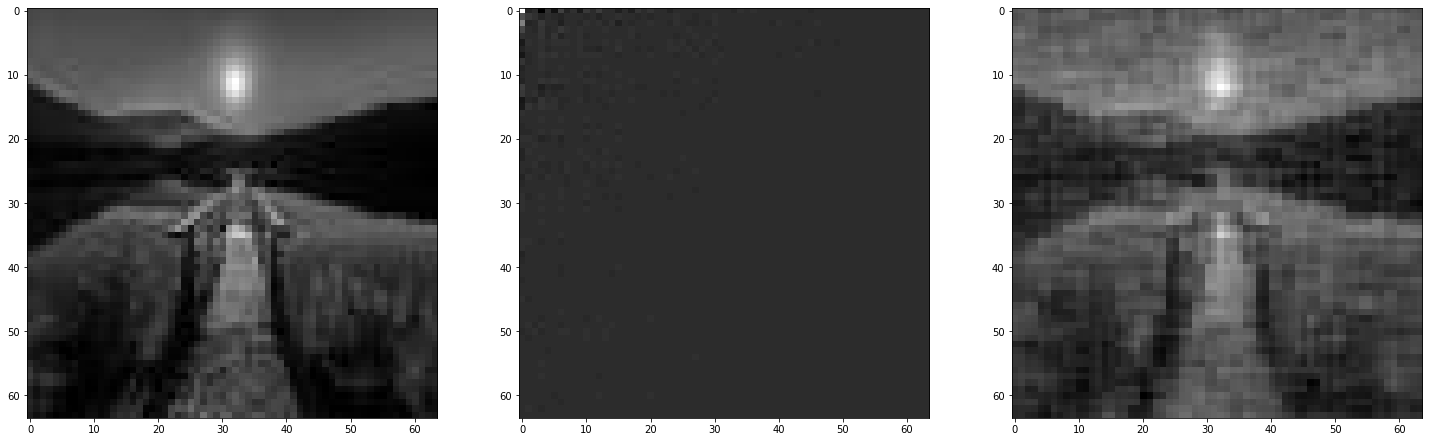

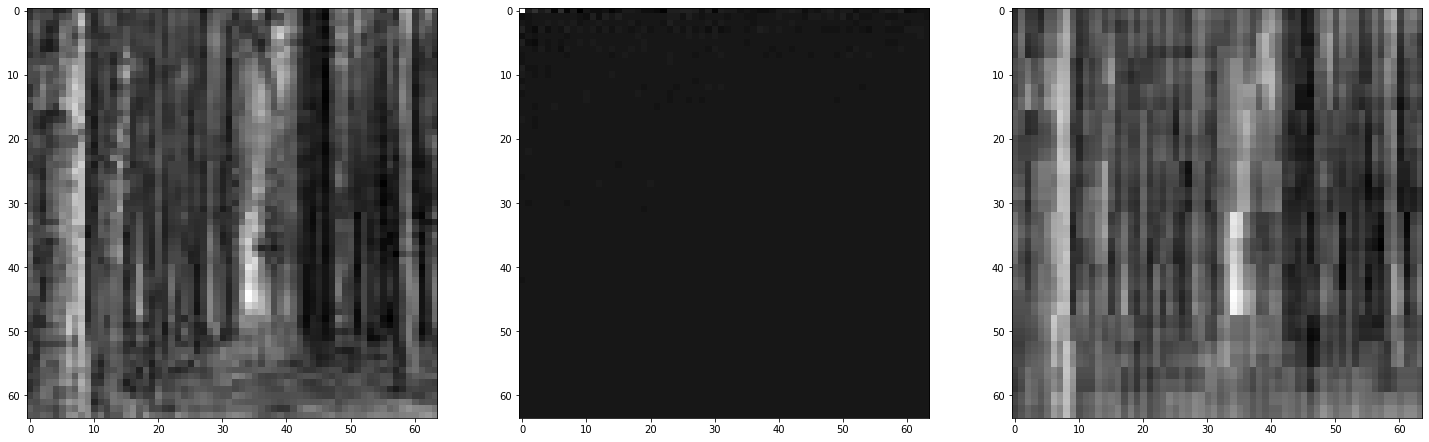

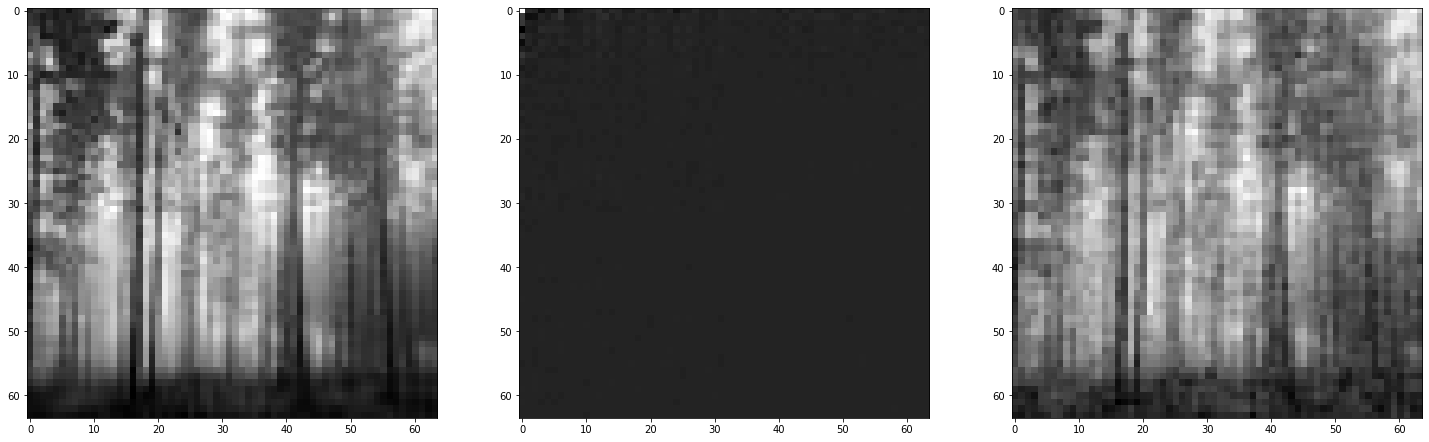

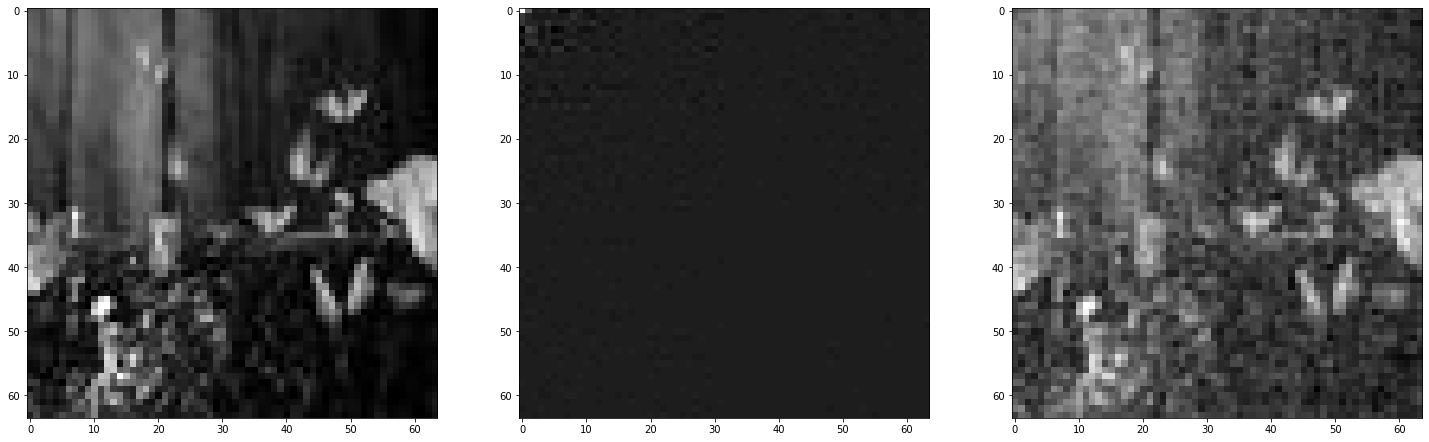

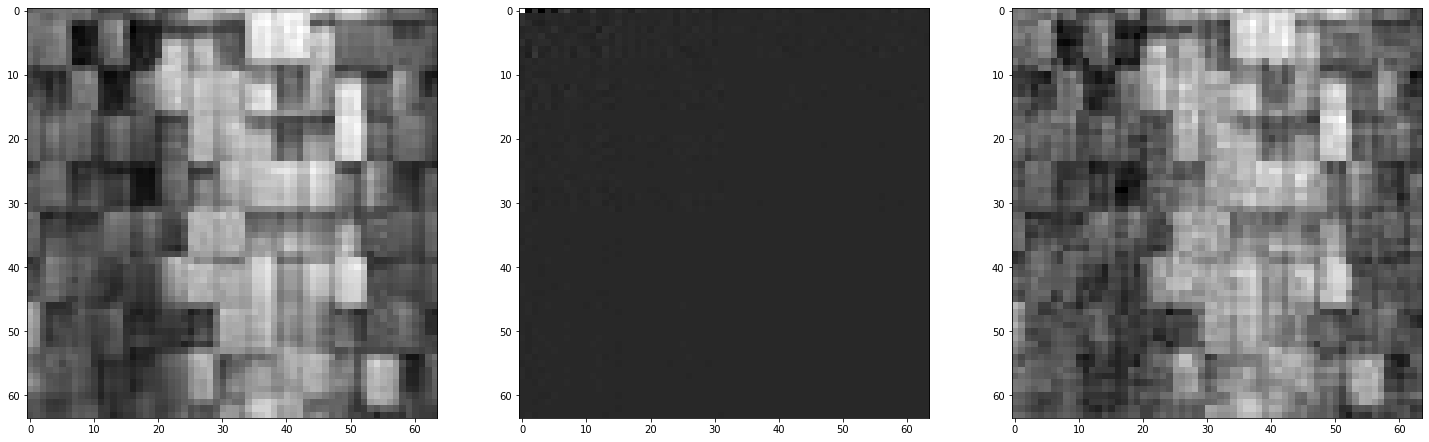

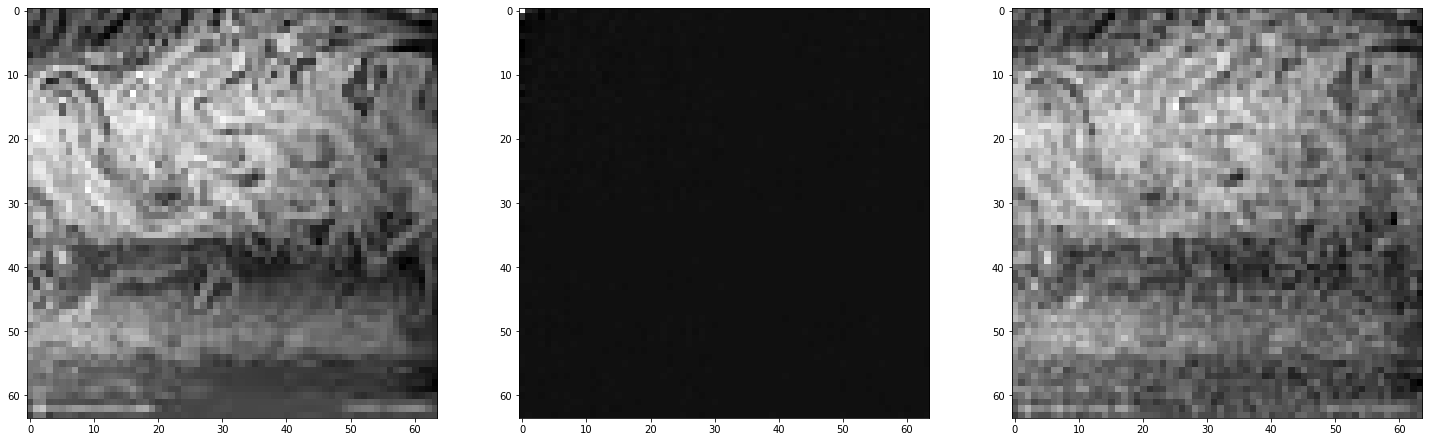

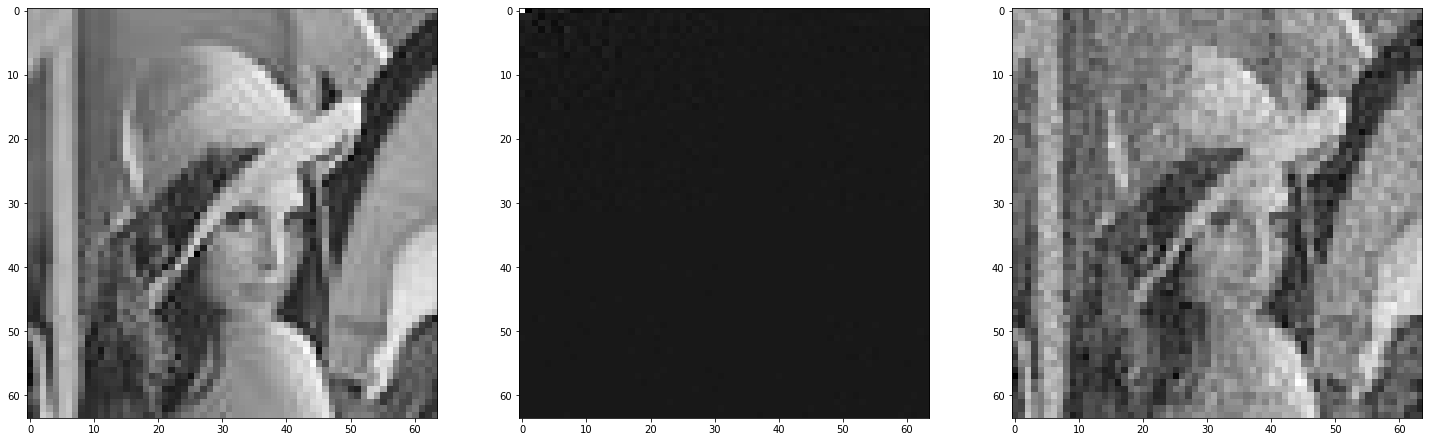

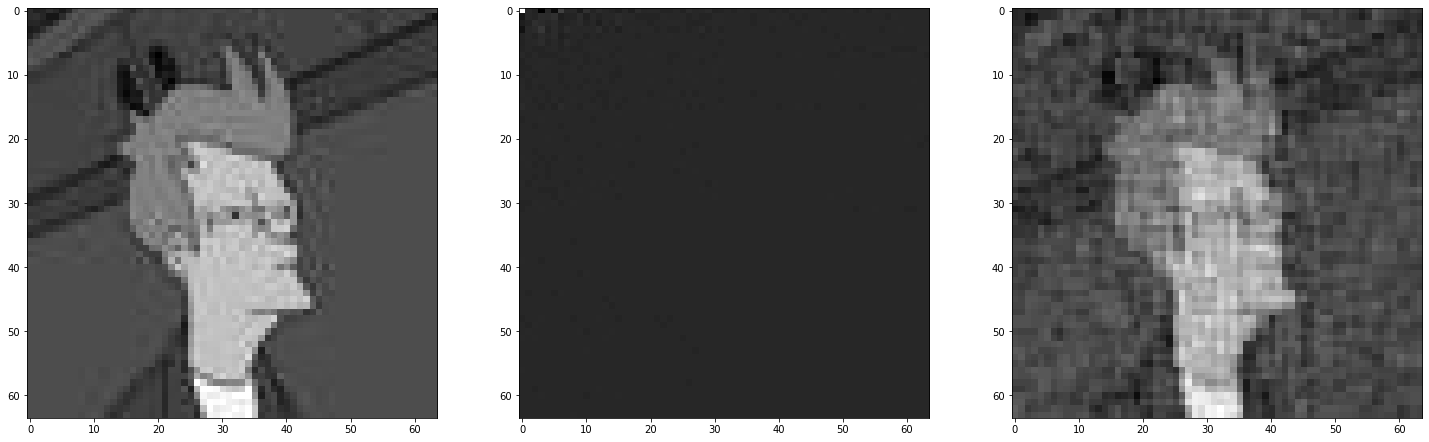

In [14]:
trans = []
inv_trans = []
for i in range(len(ima)):
    trans.append(walshTrans(ima[i]))
    inv_trans.append(InvWalshTrans(trans[i]))
    show(ima[i], trans[i], inv_trans[i])

In [15]:
# n = 32  
# for i in range(len(ima)):
#     img = ima[i].resize((n,n), Image.ANTIALIAS)
#     img.save("imagesHW2/image" + str(i+10) + ".jpg") 

In [16]:
ima = []
for filename in glob.glob('imagesHW2/32x32/*.jpg'): #assuming gif
    im = Image.open(filename)
    im = im.convert('L')
    ima.append(im)

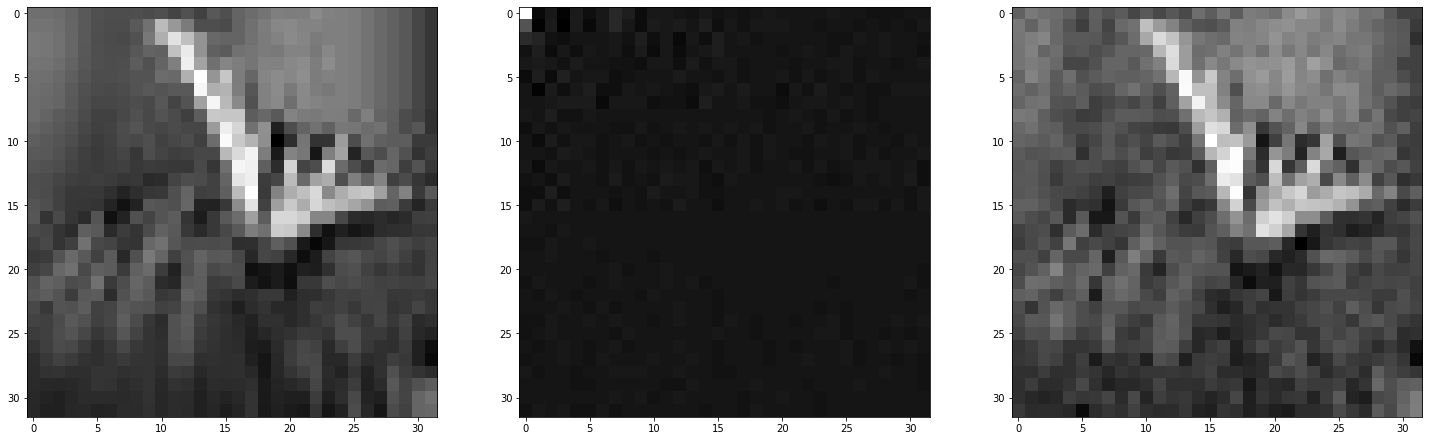

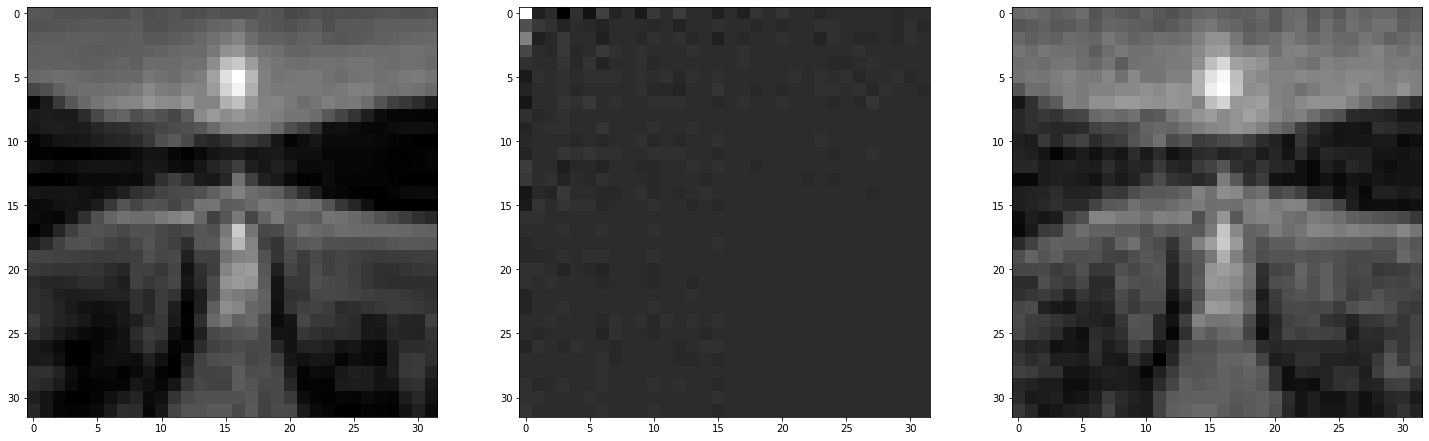

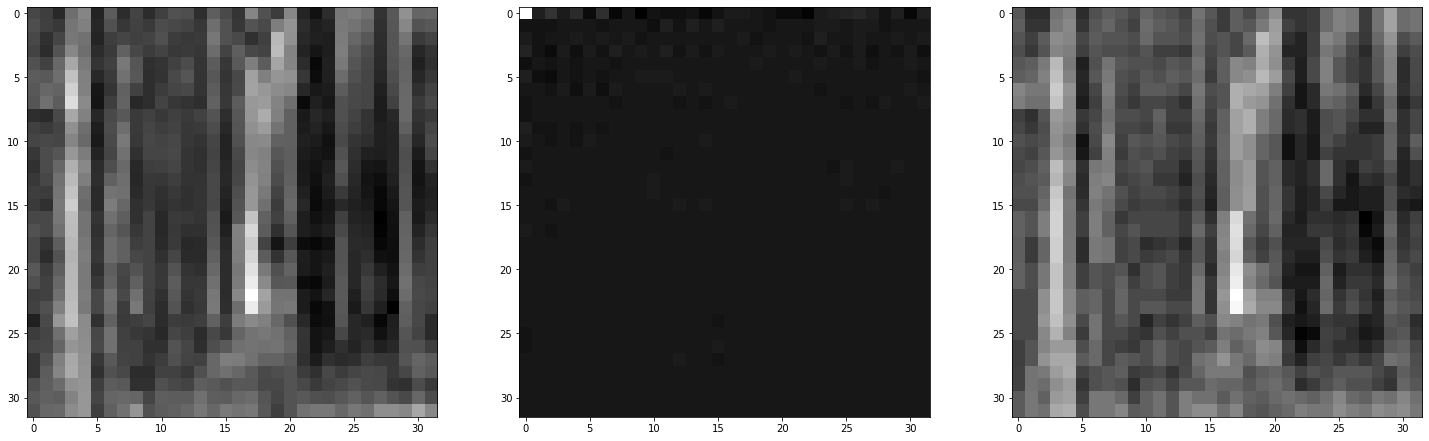

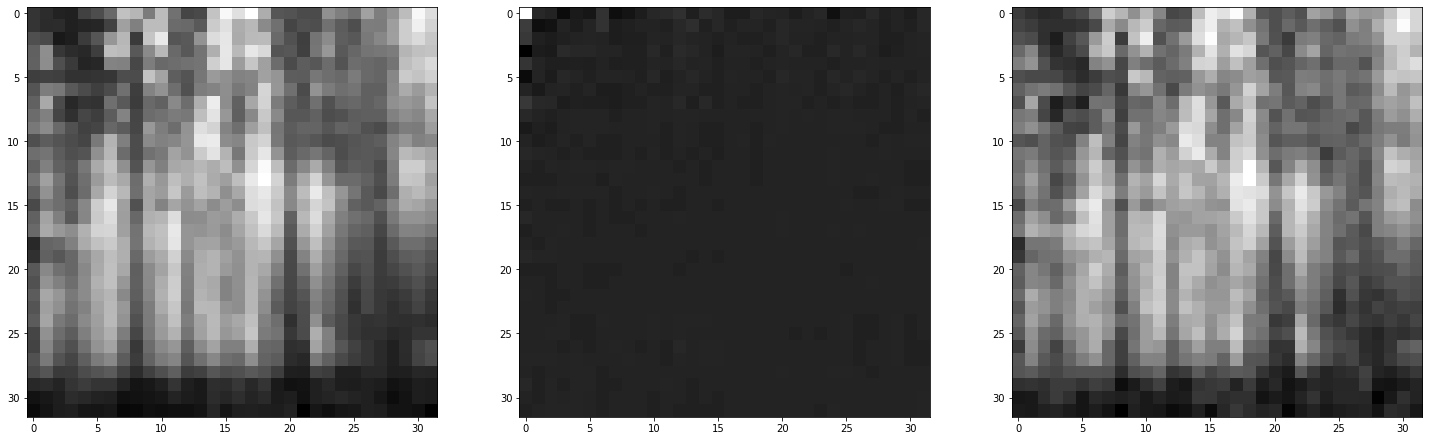

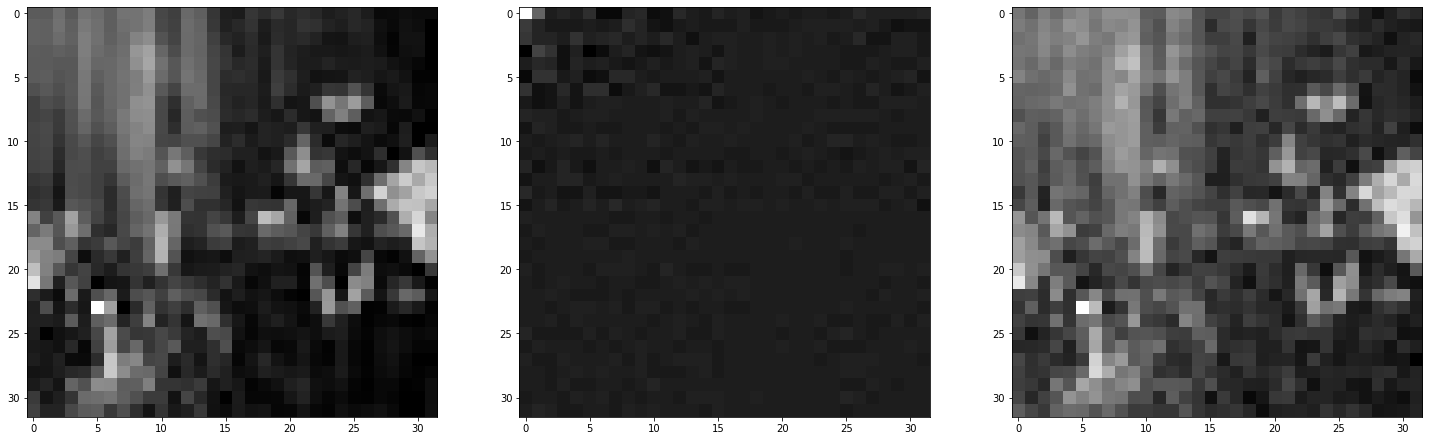

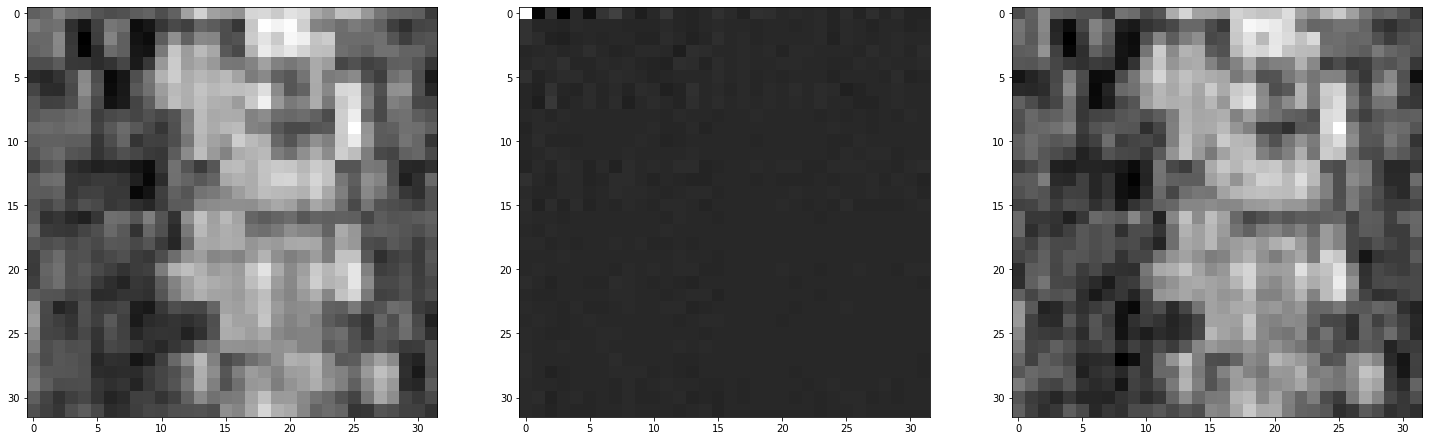

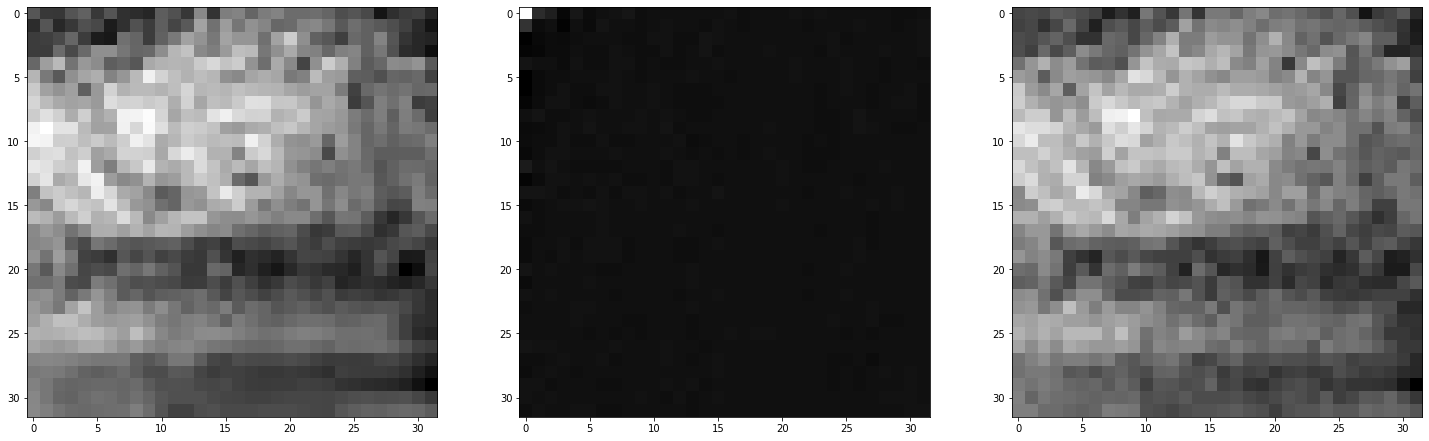

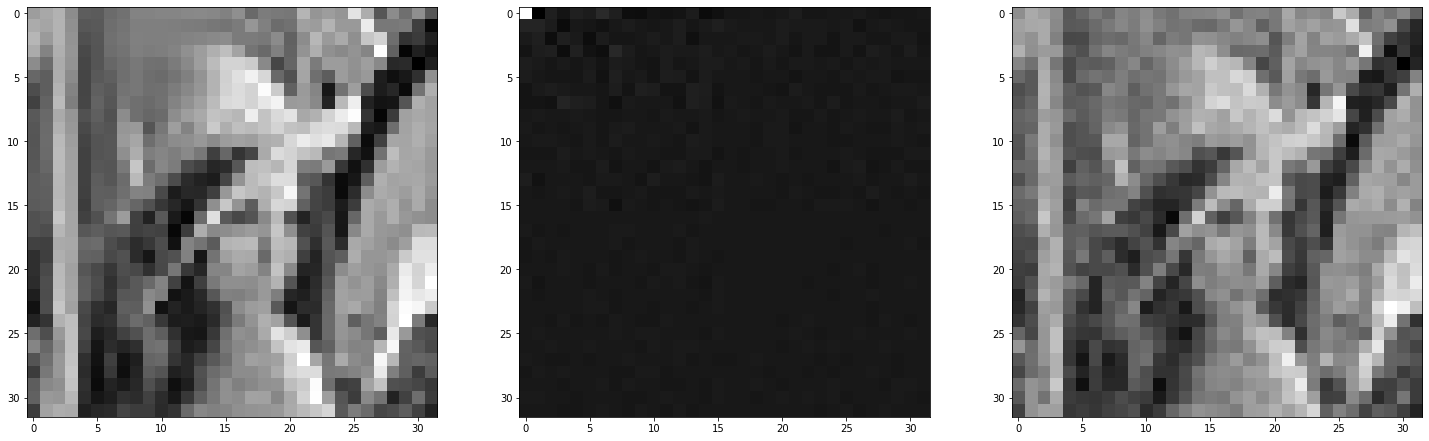

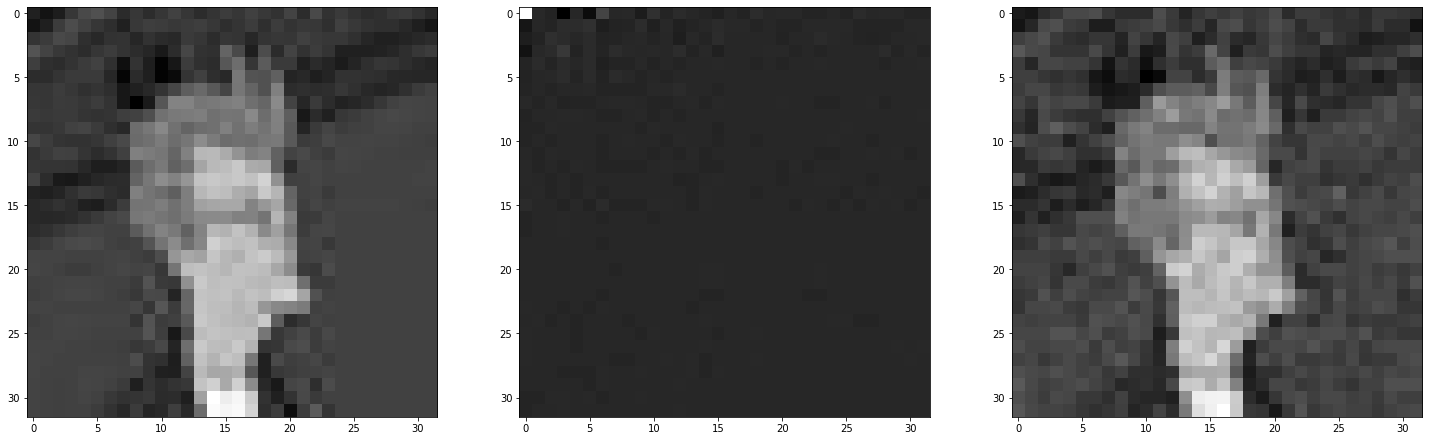

In [17]:
trans = []
inv_trans = []
for i in range(len(ima)):
    trans.append(walshTrans(ima[i]))
    inv_trans.append(InvWalshTrans(trans[i]))
    show(ima[i], trans[i], inv_trans[i])